<a href="https://colab.research.google.com/github/cleavestone/fine_tuning_bert_model/blob/main/final_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers torch scikit-learn datasets

**Load Dataset**

In [ ]:
import pandas as pd
df=pd.read_csv('/content/electronics_reviews.csv')

In [ ]:
# explore the first few rows
df.head()

,review_text,sentiment,product_category,feature_mentioned,rating
0,Best tablet I've used in a while. The battery ...,positive,tablet,battery,5
1,It’s a usable smartphone. The battery life mee...,neutral,smartphone,battery life,2
2,It’s a usable camera. The image quality meets ...,neutral,camera,image quality,3
3,Very happy with my new headphones. Highly reco...,positive,headphones,sound quality,4
4,Decent tablet. It gets the job done though the...,neutral,tablet,display,2


In [ ]:
# check for missing values
df.isnull().sum()

,0
review_text,0
sentiment,0
product_category,0
feature_mentioned,0
rating,0


In [ ]:
# check longest ans shortest review text
def check_len(df):
  words=df.split()
  return len(words)

df['review_text_len']=df['review_text'].apply(check_len)


In [ ]:
df['review_text_len'].min()

9

In [ ]:
df['review_text_len'].max()

17

In [ ]:
# check for duplicates
df[['review_text','sentiment']].duplicated().sum()

np.int64(9573)

In [ ]:
# convert review text to lower cas
df['review_text']=df['review_text'].str.lower()

In [ ]:
# drop duplicates
df_clean = df.drop_duplicates(subset=['review_text', 'sentiment'])

In [ ]:
# rename sentiment to label
df_clean=df_clean.rename(columns={'sentiment': 'label'})

<Axes: xlabel='label'>

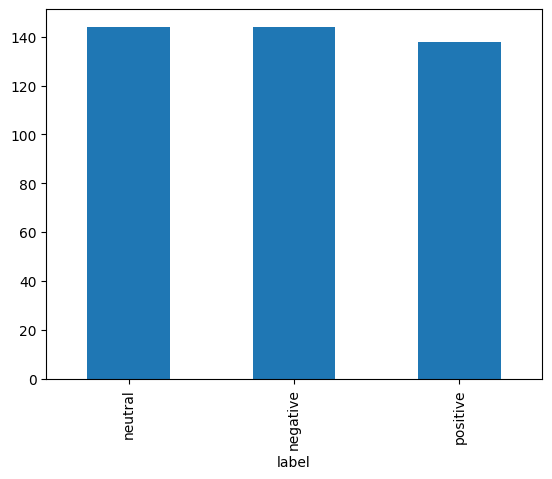

In [ ]:
# check for class imbalance
df_clean['label'].value_counts().plot.bar()

In [ ]:
df_clean.head()

,review_text,label,product_category,feature_mentioned,rating,review_text_len
0,best tablet i've used in a while. the battery ...,positive,tablet,battery,5,12
1,it’s a usable smartphone. the battery life mee...,neutral,smartphone,battery life,2,10
2,it’s a usable camera. the image quality meets ...,neutral,camera,image quality,3,10
3,very happy with my new headphones. highly reco...,positive,headphones,sound quality,4,15
4,decent tablet. it gets the job done though the...,neutral,tablet,display,2,13


In [ ]:
# map labels
df_clean['label']=df_clean['label'].map({'neutral':0,'positive':1,'negative':2})

In [ ]:
# convert to huggingface dataset
from datasets import Dataset
df_for_dataset = df_clean[['review_text', 'label']].reset_index(drop=True)
hf_dataset=Dataset.from_pandas(df_for_dataset)

In [ ]:
# split
hf_dataset=hf_dataset.train_test_split(test_size=0.1)

In [ ]:
# load the tokenizer for bert-bae-uncased
from transformers import AutoTokenizer

# Initialize the BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [ ]:
# Tokenization
def tokenize_function(examples):
    tokenized_examples = tokenizer(examples["review_text"], padding="max_length", truncation=True, max_length=128)
    tokenized_examples['label'] = examples['label']
    return tokenized_examples

# Select only the necessary columns after mapping and before tokenization
hf_dataset = hf_dataset.select_columns(['review_text', 'label'])

# Apply the tokenizer to the dataset
tokenized_datasets = hf_dataset.map(tokenize_function, batched=True, remove_columns=["review_text", "label"])

# Inspect tokenized samples
print(tokenized_datasets["train"][0])

Map:   0%|          | 0/383 [00:00<?, ? examples/s]

Map:   0%|          | 0/43 [00:00<?, ? examples/s]

{'label': 1, 'input_ids': [101, 7078, 2293, 2023, 12191, 999, 1996, 3857, 3737, 2003, 2327, 1011, 18624, 1998, 1996, 3325, 2061, 2521, 2038, 2042, 25180, 3238, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
# Load bert model
from transformers import AutoModelForSequenceClassification
from peft import LoraConfig, get_peft_model, TaskType

# Step 1: Load the pretrained model
model_name = "bert-base-uncased"
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

# Step 2: Define LoRA config
lora_config = LoraConfig(
    r=8,  # rank
    lora_alpha=16,
    target_modules=["query", "value"],  # Common for BERT
    lora_dropout=0.1,
    bias="none",
    task_type=TaskType.SEQ_CLS  # Sequence classification
)

# Step 3: Apply LoRA to your model
model = get_peft_model(model, lora_config)

# Optional: Print trainable parameters
model.print_trainable_parameters()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


trainable params: 297,219 || all params: 109,781,766 || trainable%: 0.2707


**Training Pipeline**

In [ ]:
from transformers import TrainingArguments

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",           # Directory for saving model checkpoints
    eval_strategy="epoch",     # Evaluate at the end of each epoch
    save_strategy="epoch",     # Save at the end of each epoch
    learning_rate=2e-4,              # Start with a small learning rate
    per_device_train_batch_size=16,  # Batch size per GPU
    per_device_eval_batch_size=16,
    num_train_epochs=7,              # Number of epochs
    weight_decay=0.01,               # Regularization
    save_total_limit=2,              # Limit checkpoints to save space
    load_best_model_at_end=True,     # Automatically load the best checkpoint
    logging_dir="./logs",            # Directory for logs
    logging_steps=100,               # Log every 100 steps
    fp16=True,                        # Enable mixed precision for faster training
    report_to="wandb"                # Report to TensorBoard
)

#print(training_args)

In [ ]:
!pip install evaluate

**Custom metric**

In [ ]:
from transformers import Trainer
from evaluate import load

# Load a metric (F1-score in this case)
metric = load("f1")

# Define a custom compute_metrics function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    return metric.compute(predictions=predictions, references=labels, average='weighted')

In [ ]:
# Data Collation
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
print(tokenized_datasets["train"][0])


{'label': 1, 'input_ids': [101, 7078, 2293, 2023, 12191, 999, 1996, 3857, 3737, 2003, 2327, 1011, 18624, 1998, 1996, 3325, 2061, 2521, 2038, 2042, 25180, 3238, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
from transformers import EarlyStoppingCallback

# Training
trainer = Trainer(
    model=model,                        # Pre-trained BERT model
    args=training_args,                 # Training arguments
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,        # Efficient batching
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)],# Custom metric
)

# Start training
train_output=trainer.train()

/tmp/ipython-input-195-3432128382.py:4: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Epoch,Training Loss,Validation Loss,F1
1,No log,1.042730,0.557708
2,No log,0.739587,0.679919
3,No log,0.265299,0.953067
4,No log,0.037440,1.000000
5,0.658300,0.011437,1.000000
6,0.658300,0.007700,1.000000
7,0.658300,0.007001,1.000000


In [ ]:
import matplotlib.pyplot as plt

logs = trainer.state.log_history

# Initialize containers
epochs = []
train_losses = []
eval_losses = []
eval_f1s = []

# Use a dictionary to store metrics per epoch
metrics_per_epoch = {}

for log in logs:
    if "epoch" in log:
        epoch = int(log["epoch"])  # Use integer epoch for dictionary key
        if epoch not in metrics_per_epoch:
            metrics_per_epoch[epoch] = {}

        if "loss" in log:
            metrics_per_epoch[epoch]["train_loss"] = log["loss"]
        if "eval_loss" in log:
            metrics_per_epoch[epoch]["eval_loss"] = log["eval_loss"]
        if "eval_f1" in log:
            metrics_per_epoch[epoch]["eval_f1"] = log["eval_f1"]

# Sort epochs and extract metrics
sorted_epochs = sorted(metrics_per_epoch.keys())

for epoch in sorted_epochs:
    epochs.append(epoch)
    train_losses.append(metrics_per_epoch[epoch].get("train_loss")) # Use .get to handle missing values
    eval_losses.append(metrics_per_epoch[epoch].get("eval_loss"))
    eval_f1s.append(metrics_per_epoch[epoch].get("eval_f1"))

# Remove None values that might occur if a metric was not logged for an epoch
# Note: This might still cause issues if some epochs are completely missing from logs.
# A more robust approach might be needed for sparse logs.
epochs = [e for e, tl, el, ef in zip(epochs, train_losses, eval_losses, eval_f1s) if tl is not None or el is not None or ef is not None]
train_losses = [tl for tl in train_losses if tl is not None]
eval_losses = [el for el in eval_losses if el is not None]
eval_f1s = [ef for ef in eval_f1s if ef is not None]

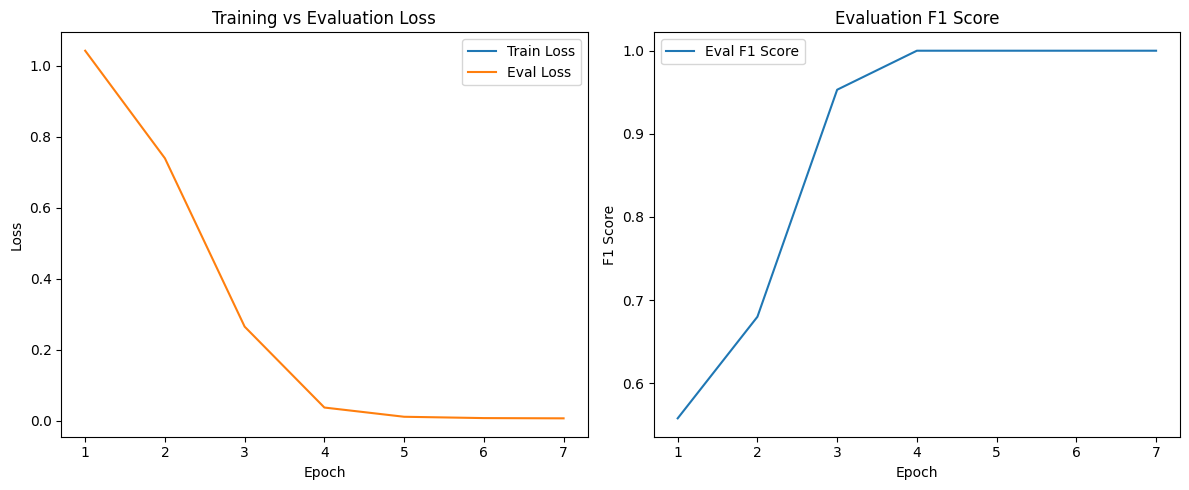

In [ ]:
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs[:len(train_losses)], train_losses, label='Train Loss')
plt.plot(epochs[:len(eval_losses)], eval_losses, label='Eval Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Evaluation Loss')
plt.legend()

# F1 score plot
plt.subplot(1, 2, 2)
plt.plot(epochs[:len(eval_f1s)], eval_f1s, label='Eval F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('Evaluation F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# save the model and tokenizer
model.save_pretrained('/content/drive/MyDrive/COMPUTER VISION')
tokenizer.save_pretrained('/content/drive/MyDrive/COMPUTER VISION')

('/content/drive/MyDrive/COMPUTER VISION/tokenizer_config.json',
 '/content/drive/MyDrive/COMPUTER VISION/special_tokens_map.json',
 '/content/drive/MyDrive/COMPUTER VISION/vocab.txt',
 '/content/drive/MyDrive/COMPUTER VISION/added_tokens.json',
 '/content/drive/MyDrive/COMPUTER VISION/tokenizer.json')

In [ ]:
# Model Evaluation
# Evaluate the model on the evaluation (test) dataset
eval_results = trainer.evaluate()
print(eval_results)


{'eval_loss': 0.0070011671632528305, 'eval_f1': 1.0, 'eval_runtime': 0.1068, 'eval_samples_per_second': 402.56, 'eval_steps_per_second': 28.086, 'epoch': 7.0}


**Zero-Shot Evaluation**

In [ ]:
test_data=pd.read_csv('/content/custom_product_reviews.csv')

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset as TorchDataset

class SimpleTextDataset(TorchDataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

def evaluate_model_on_csv(csv_path: str, num_labels: int = 3, model=None, tokenizer=None, model_name: str = None):
    """
    Evaluates a model (pretrained or fine-tuned) on a test CSV with review_text and string labels.

    Parameters:
    -----------
    csv_path : str
        Path to the test CSV file (must contain 'review_text' and 'label' columns).
    num_labels : int
        Number of sentiment classes (default 3).
    model : transformers.PreTrainedModel, optional
        Pre-loaded model. If not provided, model_name must be given.
    tokenizer : transformers.PreTrainedTokenizer, optional
        Pre-loaded tokenizer. If not provided, model_name must be given.
    model_name : str, optional
        Name of the Hugging Face model to load (e.g., 'bert-base-uncased').

    Returns:
    --------
    dict
        Classification report, confusion matrix, and predictions.
    """

    # Label mappings
    label2id = {'neutral': 0, 'positive': 1, 'negative': 2}
    id2label = {v: k for k, v in label2id.items()}

    # Load and map data
    df = pd.read_csv(csv_path)
    df = df[["review_text", "label"]].dropna()
    df["label"] = df["label"].map(label2id)

    if df["label"].isnull().any():
        raise ValueError("Some labels in the CSV could not be mapped. Check for typos in 'label' column.")

    # Load model/tokenizer if not provided
    if model is None or tokenizer is None:
        if model_name is None:
            raise ValueError("Either provide (model and tokenizer) or a model_name.")
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

    # Create dataset and dataloader
    test_dataset = SimpleTextDataset(
        texts=df['review_text'].tolist(),
        labels=df['label'].tolist(),
        tokenizer=tokenizer
    )

    test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)

    # Set model to evaluation mode
    model.eval()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    # Make predictions
    all_predictions = []
    all_labels = []

    print("Making predictions...")
    with torch.no_grad():
        for batch in test_dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
            predicted_classes = torch.argmax(predictions, dim=-1)

            all_predictions.extend(predicted_classes.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Convert to numpy arrays
    y_pred = np.array(all_predictions)
    y_true = np.array(all_labels)

    # Map back to label names
    y_pred_text = [id2label[i] for i in y_pred]
    y_true_text = [id2label[i] for i in y_true]

    # Evaluation
    report = classification_report(y_true_text, y_pred_text)
    cm = confusion_matrix(y_true_text, y_pred_text, labels=["positive", "neutral", "negative"])

    print("📊 Classification Report:")
    print(report)
    print("\n🧮 Confusion Matrix:")
    print(pd.DataFrame(cm, index=["positive", "neutral", "negative"], columns=["positive", "neutral", "negative"]))

    return {
        "report": report,
        "confusion_matrix": cm,
        "y_true": y_true_text,
        "y_pred": y_pred_text,
    }

# Usage example:
# report = evaluate_model_on_csv(model_name='bert-base-uncased', csv_path='custom_product_reviews.csv')


In [ ]:
report = evaluate_model_on_csv(model_name='bert-base-uncased', csv_path='custom_product_reviews.csv')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Making predictions...
📊 Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        31
     neutral       0.25      0.07      0.11        42
    positive       0.20      0.67      0.31        27

    accuracy                           0.21       100
   macro avg       0.15      0.25      0.14       100
weighted avg       0.16      0.21      0.13       100


🧮 Confusion Matrix:
          positive  neutral  negative
positive        18        9         0
neutral         39        3         0
negative        31        0         0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# pretained model
# Assume `model` and `tokenizer` are already loaded in memory
report2=evaluate_model_on_csv(
    csv_path="custom_product_reviews.csv",
    model=model,
    tokenizer=tokenizer
)


Making predictions...
📊 Classification Report:
              precision    recall  f1-score   support

    negative       0.78      0.94      0.85        31
     neutral       0.78      0.17      0.27        42
    positive       0.46      0.93      0.62        27

    accuracy                           0.61       100
   macro avg       0.67      0.68      0.58       100
weighted avg       0.69      0.61      0.55       100


🧮 Confusion Matrix:
          positive  neutral  negative
positive        25        2         0
neutral         27        7         8
negative         2        0        29


**Calculate Evaluation Metrics**

**Fine Tuned Model**

In [ ]:
trainer = Trainer(
    model=model,
    tokenizer=tokenizer,
)

# Run predictions on your test set
predictions = trainer.predict(tokenized_datasets["test"])

y_pred = predictions.predictions.argmax(axis=1)
y_true = predictions.label_ids


/tmp/ipython-input-204-1249912273.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


In [ ]:
import torch

# Mapping from class index to label
id2label = {0: "negative", 1: "neutral", 2: "positive"}  # Adjust as needed

def predict_sentiment(text: str, model, tokenizer, id2label: dict) -> str:
    """
    Predict sentiment of a given input text using a pretrained classification model.

    Parameters:
    -----------
    text : str
        The input text (e.g., product review).
    model : transformers.PreTrainedModel
        The Hugging Face model for sequence classification.
    tokenizer : transformers.PreTrainedTokenizer
        The tokenizer corresponding to the model.
    id2label : dict
        Dictionary mapping class index to human-readable labels.

    Returns:
    --------
    str
        The predicted sentiment label.
    """
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    device = model.device  # Get the device of the model
    inputs = {key: val.to(device) for key, val in inputs.items()} # Move inputs to the model's device
    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predicted_class_id = torch.argmax(logits, dim=1).item()

    return id2label[predicted_class_id]

In [ ]:
sample="The food was not that good, i would not but again"
print(predict_sentiment(sample, model, tokenizer, id2label))

positive
